# Titanic Survival Prediction using Machine Learning in Python 

 **step 1 : importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**step 2: data collection and processing**

In [2]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
#to find the rows , columns in the dataset

titanic_df.shape

(891, 12)

In [4]:
#to know the type and null values in the data

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# to find total number of NAN value in dataset

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**step 3 : Handling the missing values**

In [6]:
# Cabin column as 77% of null values hence dropping it

titanic1_df=titanic_df.drop(columns='Cabin',axis=1)

In [7]:
# age has 177 missing value lets replace it with mean

titanic1_df['Age'].fillna(titanic1_df['Age'].mean() , inplace=True)
titanic1_df['Age'].isnull().sum()

0

In [8]:
# embarked has value missing and is categorical value hence lets replace it with mode value i.e the value which is repeated most

titanic1_df['Embarked'].fillna(titanic1_df['Embarked'].mode()[0] , inplace=True)
titanic1_df['Embarked'].isnull().sum()

0

In [9]:
titanic1_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**step 4: Data analysis , visualization**

In [11]:
titanic1_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [14]:
# find the total count of survived or not survived
titanic1_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

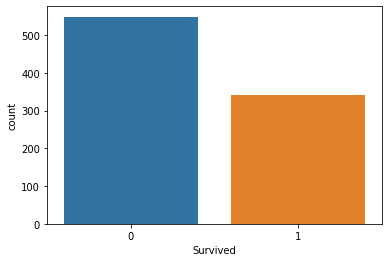

In [16]:
# plotting countplot

sns.countplot("Survived" , data =titanic1_df)

* the people survived is less than those who didn't survived

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

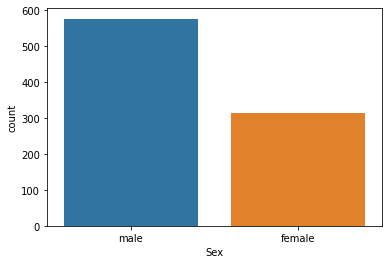

In [17]:
sns.countplot("Sex" , data = titanic1_df)

* count of male is more compared to female

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

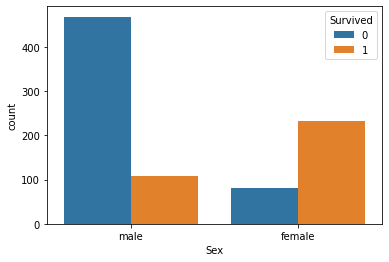

In [19]:
# plotting a countplot for survived with respect to sex

sns.countplot('Sex' , hue="Survived" , data=titanic1_df)

* Though the count of male is more the survived rate is very less compared with the female


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

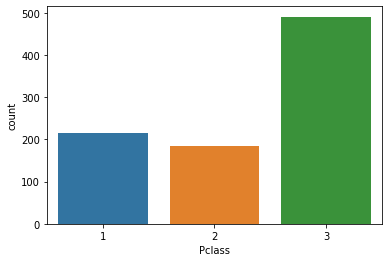

In [21]:
sns.countplot("Pclass" , data=titanic1_df)

* the number of third class people is more compared to 1 , 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

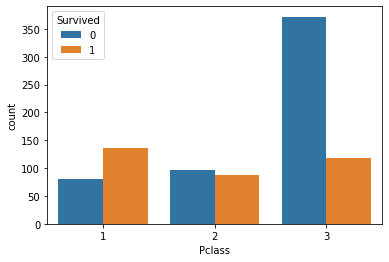

In [20]:
# plotting a countplot for survived with respect to sex

sns.countplot('Pclass' , hue="Survived" , data=titanic1_df)

**step 5: Handling the invalid values**

In [22]:
titanic1_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
titanic1_df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
#convert categorical values into numeric values

titanic1_df.replace({'Sex':{"male":0 , "female":1} ,"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [33]:
titanic1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


**step6: Feature extraction, feature selection**

In [62]:
x = titanic1_df.drop(columns=["Name" ,"Ticket" ,"Survived"],axis=1)
y=titanic_df["Survived"]

In [63]:
print(x)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500         0
1              2       1    1  38.000000      1      0  71.2833         1
2              3       3    1  26.000000      0      0   7.9250         0
3              4       1    1  35.000000      1      0  53.1000         0
4              5       3    0  35.000000      0      0   8.0500         0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000         0
887          888       1    1  19.000000      0      0  30.0000         0
888          889       3    1  29.699118      1      2  23.4500         0
889          890       1    0  26.000000      0      0  30.0000         1
890          891       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


In [64]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**step7: data splitting**

In [65]:
x_train , x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [66]:
print(x.shape,x_train.shape,x_test.shape)

(891, 8) (712, 8) (179, 8)


**step8: Model training**
    
    
    
    Logistic regression

In [67]:
model = LogisticRegression()

#model training
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* model evaluation

In [68]:
# accuracy on training data

x_train_predict = model.predict(x_train)
x_train_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [69]:
#traininig data accuracy

train_predict = accuracy_score(y_train,x_train_predict)
print("accuracy score of training data:" ,train_predict)

accuracy score of training data: 0.8033707865168539


In [70]:
# accuracy score for test data
x_test_predict=model.predict(x_test)
x_test_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [71]:
# accuracy score on test data

test_predict = accuracy_score(y_test , x_test_predict)
print("Accuracy on test data:" , test_predict)

Accuracy on test data: 0.7988826815642458


In [97]:
final_df=pd.DataFrame(x_test["PassengerId"])
final_df["Survived"]=x_test_predict
final_df.to_csv("train.csv" , index= True)
final_df_sorted = final_df.sort_values(by="PassengerId")



In [98]:
final_df_sorted

PassengerId  Survived
5              6         0
10            11         1
23            24         0
25            26         0
30            31         0
..           ...       ...
876          877         0
877          878         0
885          886         1
886          887         0
889          890         1

[179 rows x 2 columns]